<a href="https://colab.research.google.com/github/aristotelis79/collab/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

We'll use MNIST dataset in this demo. To know more about this dataset, please refer to these links, [link1](https://en.wikipedia.org/wiki/MNIST_database), [link2](https://www.tensorflow.org/datasets/catalog/mnist)

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
num_labels = len(np.unique(y_train))
num_labels

10

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [9]:
indices = np.random.randint(0, x_train.shape[0], size=16)
images = x_train[indices]

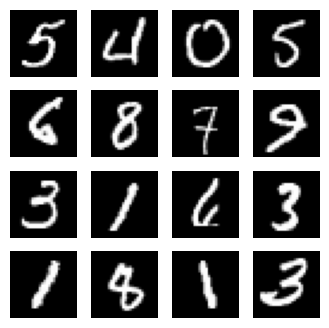

In [10]:
plt.figure(figsize=(4,4))
for i in range(len(indices)):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

Import the [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function to perform one-hot encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
y_train = to_categorical(y_train)

In [14]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [15]:
y_test = to_categorical(y_test)

In [16]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [17]:
x_train[0].shape

(28, 28)

In [18]:
x_train = np.reshape(x_train, [-1, input_size])

In [19]:
x_train[0].shape

(784,)

In [20]:
x_test = np.reshape(x_test, [-1, input_size])

In [21]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Import Sequential model from Keras. Import Dense and Dropout layers from Keras. To know more about them, consult these links. [sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), [dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), [dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

To know more about relu activation check out this [link](https://deepai.org/machine-learning-glossary-and-terms/relu).

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
model = Sequential()
model.add(Dense(512, input_dim=input_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

Compile the model by specifying the loss function and the optimizer. To know more about different loss functions and optimizers, go through these links. [link1](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c), [link2](https://towardsdatascience.com/estimators-loss-functions-optimizers-core-of-ml-algorithms-d603f6b0161a?gi=2b36a1eee48a), [link3](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 4ms/step - loss: 0.2377 - accuracy: 0.9284 - val_loss: 0.1284 - val_accuracy: 0.9616
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1124 - accuracy: 0.9656 - val_loss: 0.0914 - val_accuracy: 0.9732
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9738 - val_loss: 0.0908 - val_accuracy: 0.9719
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0684 - accuracy: 0.9780 - val_loss: 0.0944 - val_accuracy: 0.9736
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.0994 - val_accuracy: 0.9741
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0909 - val_accuracy: 0.9754
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0915 - val_accuracy:

In [27]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: ", acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9814

Test accuracy:  0.9814000129699707


In [28]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [29]:
y_pred[0]

array([2.75845872e-21, 7.87957397e-15, 3.50315683e-14, 1.05267825e-16,
       4.79025918e-17, 2.98034467e-19, 2.35955594e-25, 1.00000000e+00,
       2.40359151e-16, 4.62172921e-12], dtype=float32)

In [30]:
y_pred = y_pred.argmax(axis=1)

In [31]:
y_pred[0]

7

Import [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) to asses the efficacy of the model

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [33]:
y_test = y_test.argmax(axis=1)

In [34]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 966,    1,    0,    1,    0,    3,    4,    1,    1,    3],
       [   0, 1127,    2,    0,    0,    1,    3,    1,    1,    0],
       [   1,    0, 1012,    2,    1,    0,    3,   10,    3,    0],
       [   0,    0,    2,  996,    0,    3,    0,    4,    4,    1],
       [   1,    1,    2,    0,  956,    0,    5,    1,    2,   14],
       [   2,    0,    0,    6,    0,  874,    3,    1,    2,    4],
       [   1,    2,    0,    1,    2,    5,  945,    0,    2,    0],
       [   0,    1,   11,    1,    0,    0,    0, 1000,    4,   11],
       [   0,    0,    2,    3,    0,   10,    2,    3,  951,    3],
       [   2,    4,    1,    2,    7,    2,    0,    2,    2,  987]])

In [35]:
precision_score(y_test, y_pred, average=None)

array([0.99280576, 0.99207746, 0.98062016, 0.98418972, 0.98964803,
       0.97327394, 0.97927461, 0.97751711, 0.97839506, 0.96480938])

In [36]:
recall_score(y_test, y_pred, average=None)

array([0.98571429, 0.99295154, 0.98062016, 0.98613861, 0.97352342,
       0.97982063, 0.98643006, 0.97276265, 0.97638604, 0.97819623])